## Lendo dados um pouco mais complicados

Este notebook é um exemplo de como ler dados que precisam de alguns ajustes:

- dados em formato longo. 
- arquivo csv separado por ";".
- colunas sem nomes.
- o índice é uma data. 

Os dados são as taxas de homicídios de pessoas de 15 a 29 anos, por UF, de 1996 a 2015. A fonte dos dados é o [Atlas da Violência](http://www.ipea.gov.br/atlasviolencia/series). 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Apenas para entender melhor os dados, vamos lê-los sem atribui-los a um objeto e vendo apenas as primeiras 5 linhas. 

In [3]:
pd.read_csv('taxa-de-homicidios-faixa-etaria-de-15-29-anos-por-uf-1996-2015.csv').head()

,AP;1996;77.687
0,MG;1996;12.488
1,PR;1996;26.797
2,RJ;1996;112.799
3,SE;1996;25.375
4,PE;1996;72.12


O primeiro problema com esses dados é que o pandas não separou os dados em colunas.

Isso aconteceu porque o arquivos em csv normalmente são separados por vírgulas - daí seu nome, *comma separated values*. No entanto, nas línguas latinas - como o português - a parte decimal dos números é separada por vírgula, enquanto no inglês ela é separada por ponto. Por isso, em português é comum que os arquivos csv sejam separados por ";" (ponto e vírgula). Veja que é isso o que acontece com esses dados.

Para resolver isso, basta usar o argumento `sep=';'`.

In [4]:
pd.read_csv('taxa-de-homicidios-faixa-etaria-de-15-29-anos-por-uf-1996-2015.csv', sep=';').head()

,AP,1996,77.687
0,MG,1996,12.488
1,PR,1996,26.797
2,RJ,1996,112.799
3,SE,1996,25.375
4,PE,1996,72.120


Agora os dados estão separados em colunas.

O próximo problema é que ele usou os dados do Amapá como título. Isso aconteceu porque não havia título das colunas no conjunto de dados e o pandas supõe que a primeira linha é o título. Para resolver o problema, são necessários dois passos. 

Primeiro, o use o argumento `header=None` para indicar que não há título das colunas no conjunto de dados.

In [5]:
pd.read_csv('taxa-de-homicidios-faixa-etaria-de-15-29-anos-por-uf-1996-2015.csv', sep=';', header=None).head()

,0,1,2
0,AP,1996,77.687
1,MG,1996,12.488
2,PR,1996,26.797
3,RJ,1996,112.799
4,SE,1996,25.375


Em seguida, forneça uma lista com o nome das colunas para o argumento `names`.

In [6]:
pd.read_csv('taxa-de-homicidios-faixa-etaria-de-15-29-anos-por-uf-1996-2015.csv', sep=';', 
            header=None, names=['estado', 'ano', 'taxa']).head()

,estado,ano,taxa
0,AP,1996,77.687
1,MG,1996,12.488
2,PR,1996,26.797
3,RJ,1996,112.799
4,SE,1996,25.375


Pronto. Agora os dados foram lidos corretamente. Já podemos criar um objeto. 

**Atenção**: não se esqueça de retirar o comando `.head()`.

In [2]:
dados = pd.read_csv('taxa-de-homicidios-faixa-etaria-de-15-29-anos-por-uf-1996-2015.csv', 
                    sep=';', header=None, names=['estado', 'ano', 'taxa'])

O conjunto de dados possui 540 linhas, uma linha para cada estado em cada um dos anos de 1996 a 2015

In [10]:
dados.shape

(540, 3)

Isso significa que cada estado aparece mais de uma vez. Este formato de tabela é conhecido como formato longo (isto é, mais linhas do que o formato largo) e é um exemplo de [*tidy data*](http://vita.had.co.nz/papers/tidy-data.html) (dados bem organizados). Ele tem uma série de vantagens em termos de economia de memória e facilidade de leitura por comandos de diversas linguagens e pacotes.

No entanto, para para serem melhor compreendidos por seres humanos e para fazer gráficos de séries temporais, é preciso transformá-los para o formato largo (quer dizer, mais colunas do que o formato longo).

Isto é feito usando o comando `.pivot_table()`.

In [3]:
dados = dados.pivot_table(values='taxa', columns='estado', index='ano')
dados.head()

estado,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
ano,,,,,,,,,,,,,,,,,,,,,
1996,34.051,42.894,36.335,77.687,27.433,23.804,56.392,71.545,25.509,11.147,...,26.797,112.799,15.755,28.612,70.176,27.740,13.614,25.375,71.243,17.361
1997,39.607,33.437,37.443,68.500,29.536,26.154,57.025,88.905,23.440,10.104,...,28.010,115.588,17.044,41.095,56.114,30.924,12.716,21.780,72.267,14.905
1998,38.515,33.360,45.126,74.645,17.521,24.699,60.752,106.314,22.769,8.777,...,29.333,110.734,16.842,54.879,83.463,28.625,12.750,17.578,81.112,15.752
1999,16.517,34.681,40.722,91.299,12.541,26.315,62.589,97.019,28.498,7.481,...,30.887,106.078,11.276,44.194,98.083,30.807,10.498,33.388,89.838,20.468
2000,39.926,47.861,40.982,72.102,16.998,29.968,61.483,83.620,37.154,11.271,...,34.094,105.276,15.486,50.907,70.192,30.884,11.816,41.237,89.086,25.228


Tente entender o que aconteceu. São os mesmos dados. Não fizemos nenhum cálculo, apenas reorganizamos o dataframe. 

Veja os argumentos que usamos: os valores são aqueles que estavam na coluna taxa, as colunas são os valores que estavam na coluna estado e o índice são os valores da coluna ano. 

Isso fez com o dataframe passasse de 540 linhas e três colunas, para 20 linhas e 27 colunas, uma linha para cada ano e uma coluna para cada estado. 

In [12]:
dados.shape

(20, 27)

Nesse formato, para fazer um gráfico de linhas basta:

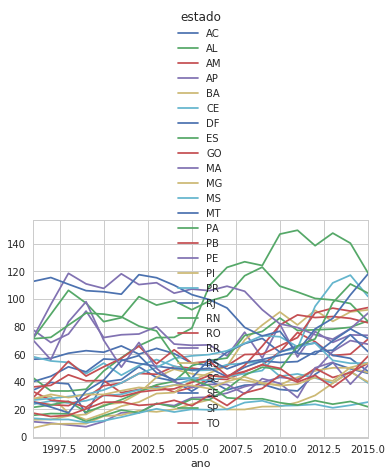

In [13]:
dados.plot();

O gráfico foi feito, mas há diversos problemas com ele. 

Em primeiro lugar, a legenda ficou muito grande. 

Isso pode ser solucionado usando o comando `plt.legend()` e o argumento `ncol`.

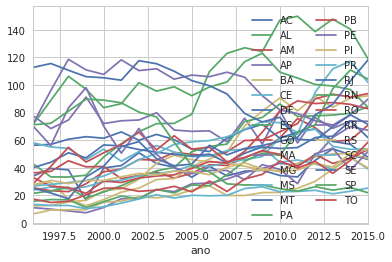

In [4]:
dados.plot()
plt.legend(ncol=2);

Por padrão, o matplotlib desenha a legenda no interior do gráfico. Isto pode ser mudado usando o argumento `bbox_to_anchor()` e um par de valores indicando a localização. Os valores corretos dependerão do seu gráfico e do argumento `loc`, que indica a lozalização da legenda. Para ver as opções, veja a documentação do comando com `SHIFT+TAB` ou `plt.legend?`. 

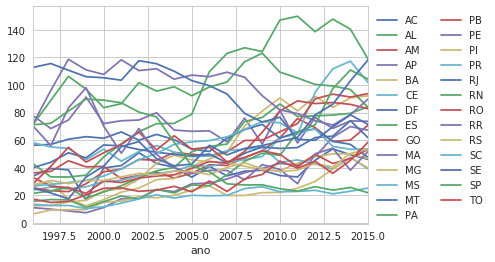

In [5]:
dados.plot()
plt.legend(loc='best', bbox_to_anchor=(1, 1),  ncol=2);

Outro problema do gráfico é a quantidade de linhas, o que dificulta muito a análise.  

Uma solução é selecionar apenas os estados que mais lhe interessar.

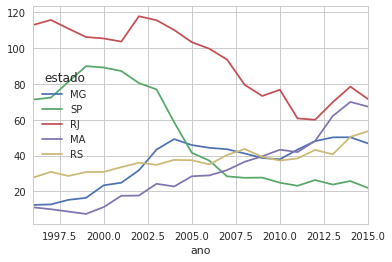

In [8]:
selecionados = ['MG', 'SP', 'RJ', 'MA', 'RS']
dados[selecionados].plot();

Para melhorar o gráfico, podemos aumentar o tamanho da figura com `figsize` e a espessura da linha com `linewidth`. E mudar a localização da legenda.

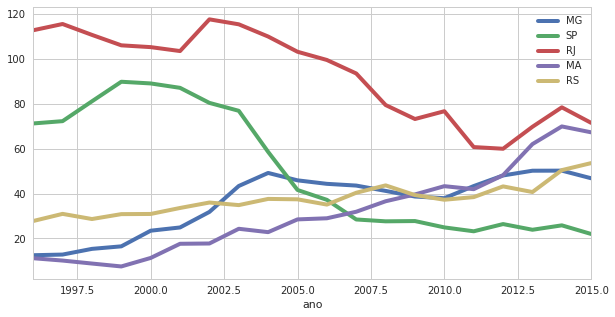

In [9]:
selecionados = ['MG', 'SP', 'RJ', 'MA', 'RS']
dados[selecionados].plot(figsize=(10, 5), linewidth=4)
plt.legend(loc='upper right');

Um próximo problema são os valores do eixo x. Apesar de serem anos, o matplotlib supôs que fossem números comuns e está até mesmo colocando valores decimais.

Para solucionar isso, é preciso converter os valores dos anos em tipo *datetime*. depois da transformação que fizemos com o comando `.pivot_table()` os anos deixaram de ser uma coluna comum e se transformaram no índice. Por isso, vamos usar o comando `pd.to_datetime()` para modificar o índice do dataframe. No argumento `format='%Y'`, estamos indicando que queremos que apenas o ano seja indicado (e não também o mês, por exemplo).  

In [13]:
dados.index = pd.to_datetime(dados.index, format='%Y')

Feito isso, basta gerar o gráfico novamente e a formatação do eixo y melhorará.

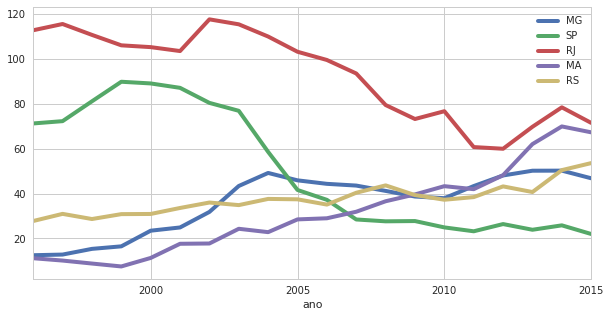

In [20]:
selecionados = ['MG', 'SP', 'RJ', 'MA', 'RS']
dados[selecionados].plot(figsize=(10, 5), linewidth=4)
plt.legend(loc='upper right');

Um próximo passo é retirar o título do eixo x, pois nesse caso é óbvio que são os anos, e acrescentar o eixo y. Um detalhe do eixo y é a expressão '\n', que serve para dividir o título em duas linhas, inserindo uma quebra de linha.

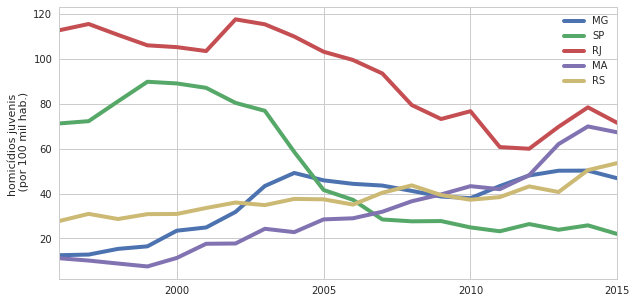

In [21]:
selecionados = ['MG', 'SP', 'RJ', 'MA', 'RS']
dados[selecionados].plot(figsize=(10, 5), linewidth=4)
plt.legend(loc='upper right')
plt.ylabel('homicídios juvenis \n (por 100 mil hab.)')
plt.xlabel('');

Um último passo é mudar algumas configurações do estilo do gráfico. 

Esses comandos alteram os gráficos que serão criados daqui em diante.

In [8]:
plt.rc('axes', linewidth='.7', edgecolor='.7', labelcolor='.2')   # clareia as linhas dos eixos x e y
plt.rc('grid', color='1')                                         # linhas de grade em branco  
plt.rc('axes.spines', top=False, right=False)                     # retira os eixos superior e direito  
plt.rc('xtick', color='.2')                                       # clareia os valores dos eixos x e y        
plt.rc('ytick', color='.2')

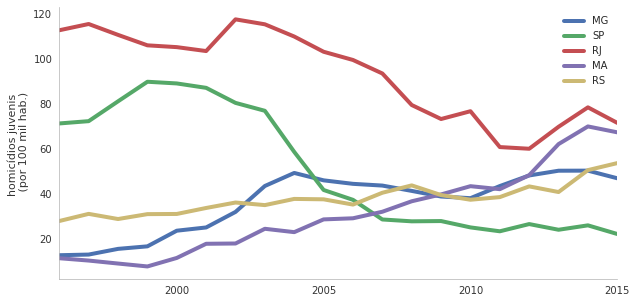

In [9]:
selecionados = ['MG', 'SP', 'RJ', 'MA', 'RS']
dados[selecionados].plot(figsize=(10, 5), linewidth=4)
plt.legend(loc='upper right')
plt.ylabel('homicídios juvenis \n (por 100 mil hab.)')
plt.xlabel('');

Por fim, é possível solucionar o problema das 27 linhas, chamando apenas para algumas delas.  

Isso é feito criando três gráficos sobrepostos. No primeiro, todas as linhas são criadas em cinza. 
No segundo gráfico, apenas uma linha é criada, em cor diferente. E a mesma coisa é repetida no terceiro gráfico.

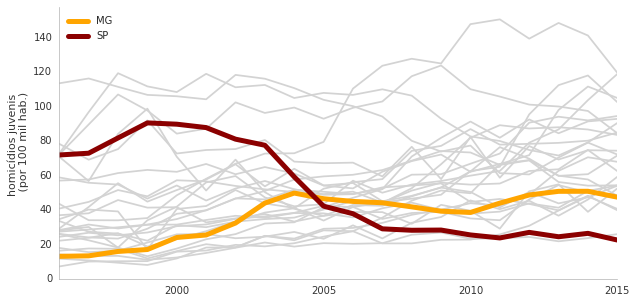

In [23]:
dados.plot(legend=False, c='lightgray', figsize=(10, 5))           # todos os estados, em cinza
dados['MG'].plot(legend=True, c='orange', linewidth=5, label='MG') # apenas MG, amarelo
dados['SP'].plot(legend=True, c='darkred', linewidth=5, label='SP') 
plt.ylabel('homicídios juvenis \n (por 100 mil hab.)')
plt.xlabel('');

<br>
<br>
Por termos feito tudo passo a passo, pode parecer que o que fizemos foi excessivamente complicado, mas não é.

Aqui estão todos os comandos necessários para ler os dados e fazer a versão final dos dois gráficos.

In [24]:
dados = pd.read_csv('taxa-de-homicidios-faixa-etaria-de-15-29-anos-por-uf-1996-2015.csv', 
                    sep=';', header=None, names=['estado', 'ano', 'taxa'])

dados = dados.pivot_table(values='taxa', columns='estado', index='ano') 

dados.index = pd.to_datetime(dados.index, format='%Y')

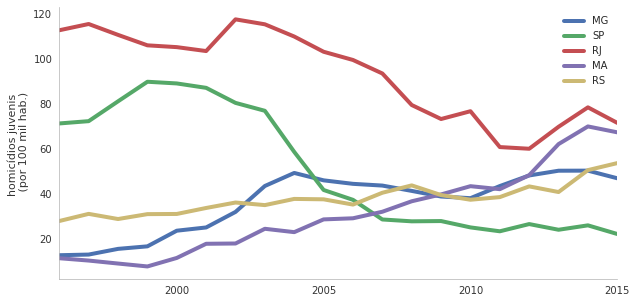

In [25]:
selecionados = ['MG', 'SP', 'RJ', 'MA', 'RS']
dados[selecionados].plot(figsize=(10, 5), linewidth=4)
plt.legend(loc='upper right')
plt.ylabel('homicídios juvenis \n (por 100 mil hab.)')
plt.xlabel('');

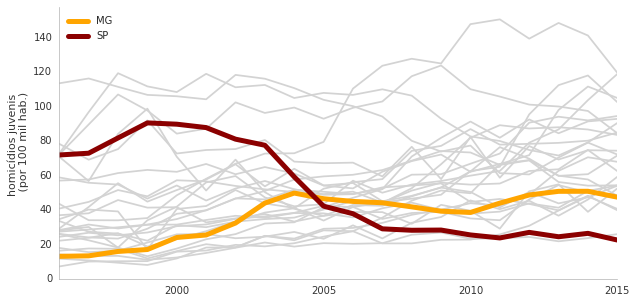

In [26]:
dados.plot(legend=False, c='lightgray', figsize=(10, 5))           # todos os estados, em cinza
dados['MG'].plot(legend=True, c='orange', linewidth=5, label='MG') # apenas MG, amarelo
dados['SP'].plot(legend=True, c='darkred', linewidth=5, label='SP') 
plt.ylabel('homicídios juvenis \n (por 100 mil hab.)')
plt.xlabel('');